# MacKey Glass Series

In [78]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

np.random.seed(1)
%matplotlib inline

Generate a MacKey Glass timeseries

In [60]:
def mackey_glass(length, beta=0.2, gamma=0.1, n=10, tau=25, noise=0):
    x = np.zeros(length)
    x[0] = 1.5

    for i in range(0, length - 1):
        x[i + 1] = x[i] + (beta * x[i - tau]) / (1 + x[i - tau] ** n) - gamma * x[i]

    return x


def generate_data(t_start=301, t_end=1501, lags=[20, 15, 10, 5, 0], noise=0):
    rows = t_end - t_start
    columns = len(lags)
    inputs = np.zeros((rows, columns))

    sequence = mackey_glass(t_end + 5, noise=noise)

    for i, time in enumerate(lags):
        inputs[:, i] = sequence[0:t_end][(t_start - time): (t_end - time)]

    output = np.array(sequence[t_start + 5: t_end + 5])
    return np.array(inputs), output.reshape(output.shape[0], 1), sequence

def split_dataset(patterns, targets, n_train=800, n_val=1000, n_test=1200):
    X_train = patterns[:n_train]
    X_val = patterns[n_train:n_val]
    X_test = patterns[n_val:n_test]
    
    y_train = targets[:n_train]
    y_val = targets[n_train:n_val]
    y_test = targets[n_val:n_test]
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [61]:
def plot_series(t, y_train, y_val, y_test, n_train=800, n_val=1000, n_test=1200):
    fig, ax = plt.subplots(figsize=(11, 5))
    plt.plot(t[:n_train], y_train[:, 0], label="Train Data", linewidth=2.6)
    plt.plot(t[n_train:n_val], y_val[:, 0], label="Val Data", linewidth=2.6)
    plt.plot(t[n_val:n_test], y_test[:, 0], label="Test Data", linewidth=2.6)
    plt.axvline(t[0]+n_train, color='#333333', linestyle=':')
    plt.axvline(t[0]+n_val, color='#333333', linestyle=':')
    plt.legend()
    ax.set_title("Mackey Glass Series", fontsize=16, pad=12)
    ax.set_xlabel("$t$")
    ax.set_ylabel("$x(t)$")
    plt.setp(ax.spines.values(), color='#374151')

In [63]:
patterns, targets, sequence = generate_data()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_dataset(patterns, targets)

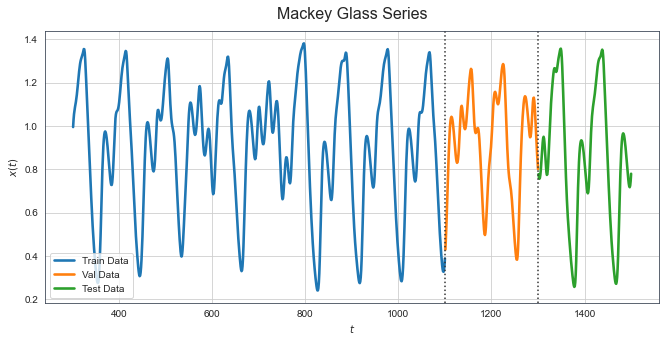

In [64]:
t = np.arange(301, 1501)
plot_series(t, y_train, y_val, y_test)

In [65]:
def generate_mackey_glass(max_t, beta=0.2, gamma=0.1, n=10, tau=25):
    """Generate a Mackey Glass Series containing of `max_t` data points"""
    x = np.empty(max_t + 1)
    x[0] = 1.5
    for t in range(1, max_t + 1):
        x_prev = x[t-1]
        x_t = 0 if t < tau else x[t - tau]
        x[t] = x_prev + (beta * x_t) / (1 + x_t**n) - gamma * x_prev
    
    return x

In [72]:
my_sequence = generate_mackey_glass(1500)

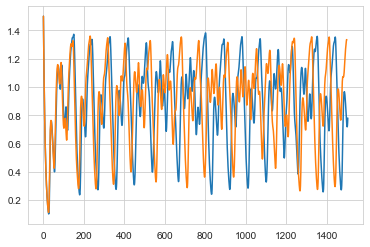

In [73]:
plt.plot(sequence)
plt.plot(my_sequence)

In [71]:
sequence.shape, my_sequence.shape

((1506,), (1201,))

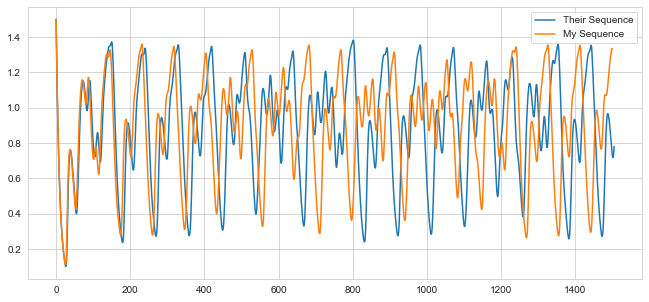

In [93]:
mila_sequence = mila_mackey_glass()
fig, ax = plt.subplots(figsize=(11, 5))
plt.plot(sequence, label='Their Sequence', linewidth=1.5)
plt.plot(my_sequence, label='My Sequence', linewidth=1.5)
plt.legend()

fig.savefig('./time_series.png')